In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from spectral_cube import SpectralCube
import astropy.units as u
from astropy.utils import data
from astropy.io import fits
import  aplpy

In [2]:
OAr = np.zeros((21,36))
OAb = np.zeros((21,36))
X_OAr = np.zeros((21,36))
X_OAb = np.zeros((21,36))


A  = np.zeros((21,2))
Mu = np.zeros((21,2))
Sig= np.zeros((21,2))
C  = np.zeros((21,2))
Mu_err = np.zeros((21,2))
Sig_err = np.zeros((21,2))

# Aquila_02

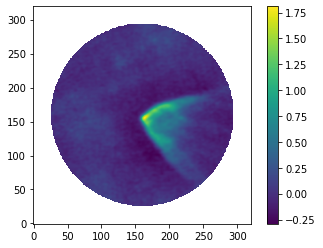

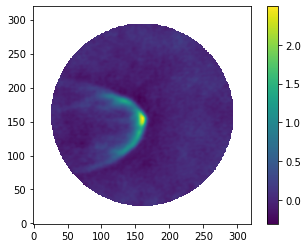

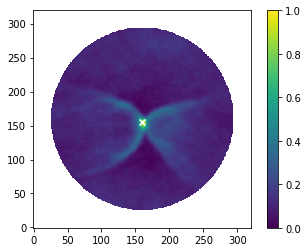

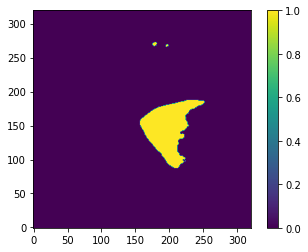

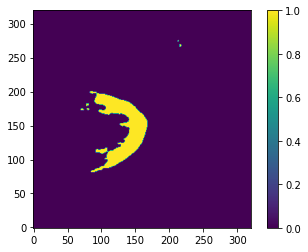

In [6]:
image_file_b = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_02_12co_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_02_12co_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="white", label="RA/Dec Mark")
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.2,1.0,0.0 )
maskr = np.where(image_datar > 0.2,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

In [7]:
image_header = fits.getheader(image_file_r, ext=0)
#image_header#['CRPIX1']

print(image_header['BUNIT'])

beam-1 Jy km s-1


In [5]:
#import skycoord, units, wcs, fits, from astropy
#from fits header create a wcs object
#using wcs object and ra dec inputs create a skycoord object
# wcsobj.worldttopix() convert the skycoord object to pixel x and y


from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename


f = fits.open(image_file_b)
image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

sky = SkyCoord('18 29 23.41 -1 38 55.72', unit=(u.hourangle, u.deg))
x_source, y_source = w.world_to_pixel(sky)

print(x_source, y_source) 

158.9331764567587 154.85423474067397


(320, 320)


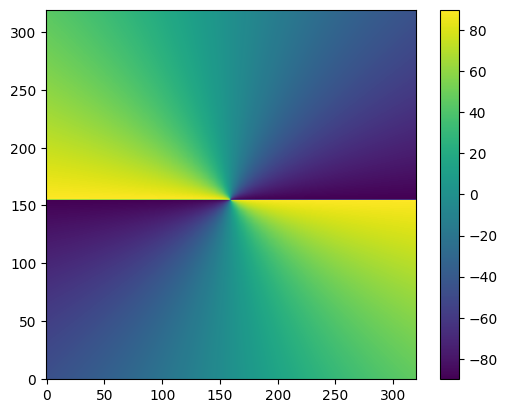

In [58]:
#print(image_header['CRPIX1'])
#print(image_header['CRPIX2'])

PA_grid = np.full((image_header['NAXIS1'],image_header['NAXIS2']),0.0)
print(PA_grid.shape)
 
for i in range(PA_grid.shape[0]):
    for j in range(PA_grid.shape[1]):
        x = i-y_source
        y = j-x_source
        if x ==0:
            #pass
            PA_grid[i][j] = -np.arctan(np.inf)/np.pi*180
        else:
            PA_grid[i][j] = -np.arctan(y/x)/np.pi*180
        
plt.imshow(PA_grid,origin='lower')
plt.colorbar()
plt.show()

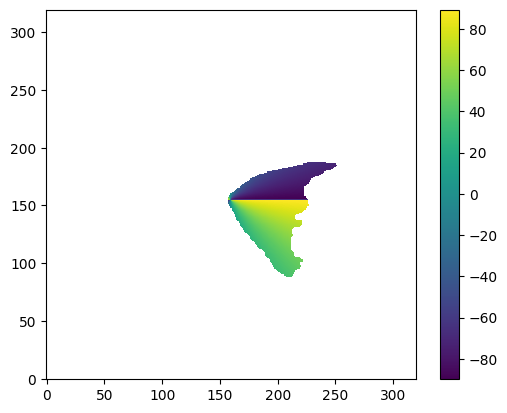

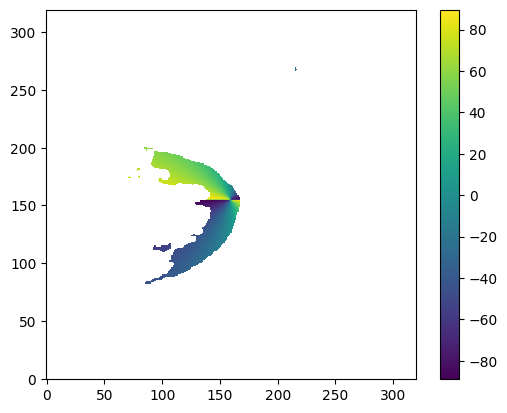

In [59]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
B[250:,:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

In [60]:
#print(len(binrange))

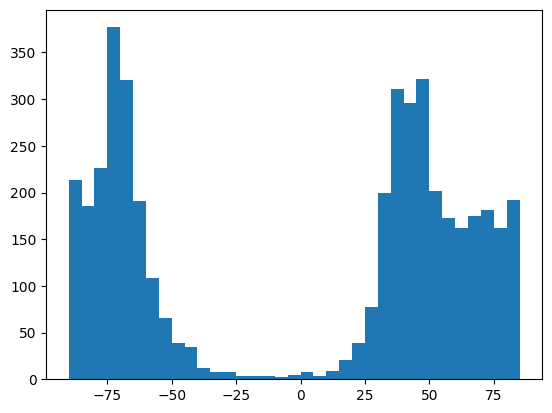

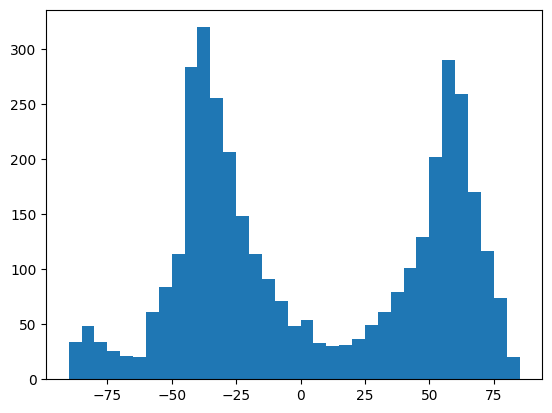

[213. 186. 226. 377. 321. 191. 109.  66.  39.  35.  12.   8.   8.   3.
   3.   4.   2.   5.   8.   4.   9.  21.  39.  77. 199. 311. 296. 322.
 202. 173. 162. 175. 181. 162. 192.]
[-90. -85. -80. -75. -70. -65. -60. -55. -50. -45. -40. -35. -30. -25.
 -20. -15. -10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.
  50.  55.  60.  65.  70.  75.  80.  85.]
35 36
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]


In [61]:
binrange = np.arange(-90,90,5)
outputb = plt.hist(B.flatten(),bins=binrange)

plt.show()


outputr = plt.hist(R.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)
PA2=np.arange(-90,260,5)#(astropy.coordinates) #— Astropy v5.3.3

(array([17]),)
36


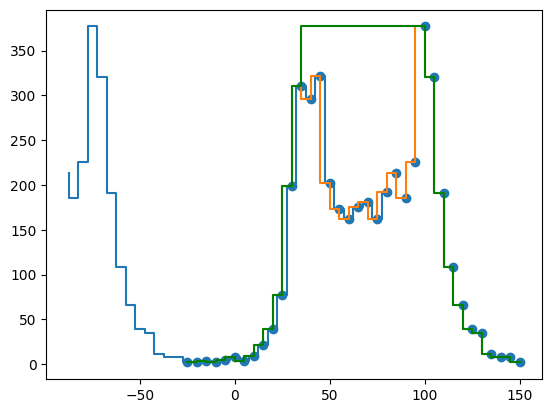

In [62]:
#BLUE

#PA=np.arange(2.5,177.5,5)
print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0], ds='steps')
x1=20
x2=27
x3=1
x4=6
y1=2
y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputb[0][y1], ls='dashed', c='r')
#plt.axhline(outputb[0][y2],ls='dashed', c='g')
#plt.show()

cent=np.where(PA==-22.5)[0][0]

flipped_array_y=np.r_[outputb[0][cent:],(outputb[0][0:cent+1])]

flipped_array_x=PA2[cent:cent+len(flipped_array_y)]
print(len(flipped_array_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
plt.plot(flipped_array_x,flipped_array_y, ds='steps')
plt.scatter(flipped_array_x,flipped_array_y)


x_subset = np.concatenate((flipped_array_x[:13], flipped_array_x[-11:]))
y_subset = np.concatenate((flipped_array_y[:13], flipped_array_y[-11:]))
plt.plot(x_subset,y_subset, ds='steps', color='g')

36


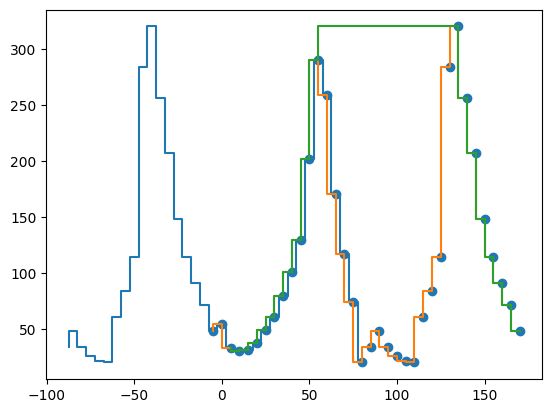

In [63]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0], ds='steps')
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

centr=np.where(PA==-2.5)[0][0]

flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subsetr = np.concatenate((flipped_arrayr_x[2:13], flipped_arrayr_x[-8:]))
y_subsetr = np.concatenate((flipped_arrayr_y[2:13], flipped_arrayr_y[-8:]))
plt.plot(x_subsetr,y_subsetr, ds='steps')

Std error [0.36625301 0.78343727]


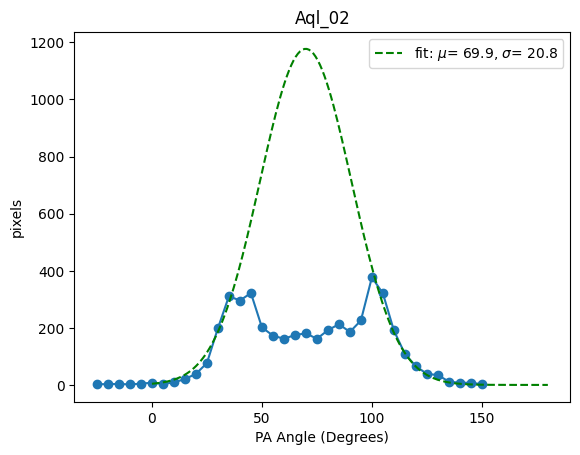

Std error [0.32952199 0.9793342 ]


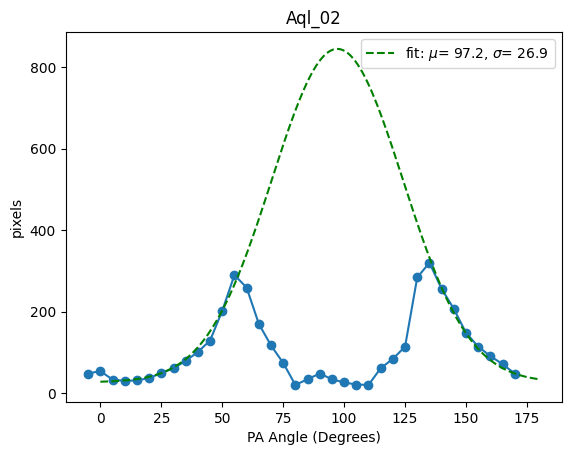

In [64]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c

#BLUE
plt.figure()
#plt.hist(B.flatten(),bins=binrange)
target_func = gaussian
#popt, pcov = curve_fit(target_func,PA,outputb[0],p0=[300,25,20,1], maxfev=100000)
#popt, pcov = curve_fit(target_func,np.r_[PA2[20:27],PA2[37:-16]],\
                       #np.r_[outputb[0][20:27],outputb[0][2:-16]],p0=[300,75,20,1], maxfev=100000)

popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,75,30,1], maxfev=100000)

plt.scatter(flipped_array_x,flipped_array_y)
plt.plot(flipped_array_x,flipped_array_y)

x = np.linspace(-0,180,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_02")
plt.savefig("Aql_02_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]


#RED
plt.figure()
#plt.hist(R.flatten(),bins=binrange)
target_func = gaussian
#popt, pcov = curve_fit(target_func,PA,outputr[0],p0=[500,0,45,1], maxfev=100000)

popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[300,90,30,1], maxfev=100000)

plt.scatter(flipped_arrayr_x,flipped_arrayr_y)
plt.plot(flipped_arrayr_x,flipped_arrayr_y)

x = np.linspace(-0,180,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_02")
plt.savefig("Aql_02_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

In [65]:
print(C)

[[ 0.3873348  26.64139122]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


Blue Velocity Lobe
Largest y Peak: 226.0
Corresponding x for Largest y: 35
Second Largest y Peak: 222.0
Corresponding x for Second Largest y: 100
65


Red Velocity Lobe
Largest Y Peak: 294.0
Corresponding x for Largest y: 135
Second Largest y Peak: 290.0
Corresponding x for Second Largest y: 55
80


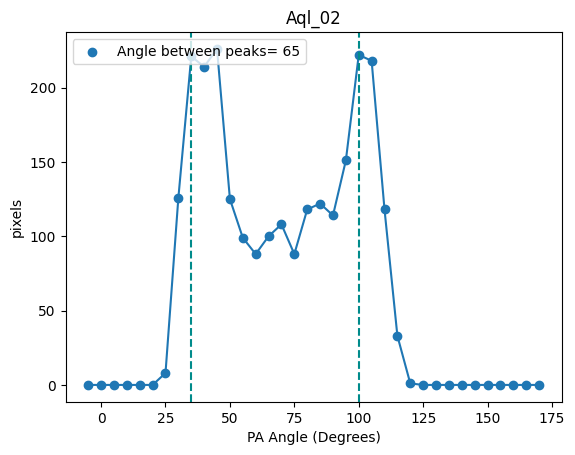

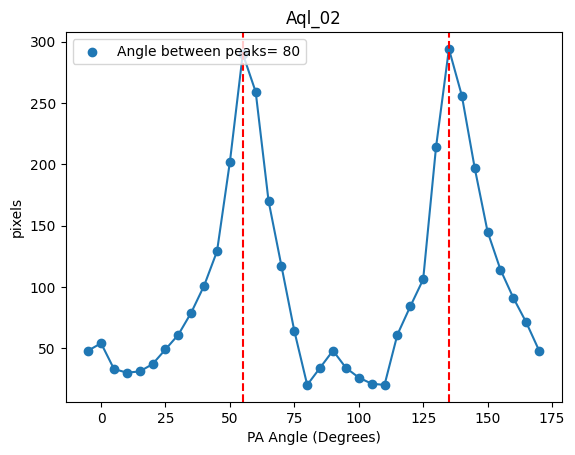

In [87]:
#Diego's Method

# Initialize variables to store the largest and second largest y-values
largest_y = float('-inf')  # Initialize with negative infinity
second_largest_y = float('-inf')  # Initialize with negative infinity

x_largest = 0
x_second_largest = 0

# Iterate along the x-axis and find the largest and second largest y-values and their corresponding x-values
for x, y in zip(flipped_array_x,flipped_array_y):
    if x < 75 and y > largest_y:
        second_largest_y = largest_y
        largest_y = y
        x_second_largest = x_largest
        x_largest = abs(x-10)
        x_marker1=x-10
    elif x > 75 and y > second_largest_y and y != largest_y:
        second_largest_y = y
        x_second_largest = abs(x)
        x_marker2=x
    final=abs(x_largest-x_second_largest)

# Print the largest and second largest y-values along with their corresponding x-values
print("Blue Velocity Lobe")
print("Largest y Peak:", largest_y)
print("Corresponding x for Largest y:", x_largest)
print("Second Largest y Peak:", second_largest_y)
print("Corresponding x for Second Largest y:", x_second_largest)
print(final)
print("\n")

#print("xm2", x_marker1)

plt.figure()
plt.scatter(flipped_array_x,flipped_array_y)
plt.plot(flipped_array_x,flipped_array_y)
plt.axvline(x_largest,ls='dashed', c='darkcyan')
plt.axvline(x_second_largest,ls='dashed', c='darkcyan')
plt.legend(["Angle between peaks= " + str(final)], loc='upper left')
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_02")
plt.savefig("Aql_02_opening_angle_blue_diff.pdf",dpi=300)


#RED

# Initialize variables to store the largest and second largest y-values
largest_y = float('-inf')  # Initialize with negative infinity
second_largest_y = float('-inf')  # Initialize with negative infinity

x_largest = 0
x_second_largest = 0

# Iterate along the x-axis and find the largest and second largest y-values and their corresponding x-values
for x, y in zip(flipped_arrayr_x,flipped_arrayr_y):
    if y > largest_y:
        second_largest_y = largest_y
        largest_y = y
        x_second_largest = x_largest
        x_largest = abs(x)
        x_rmarker1=x
    elif y > second_largest_y and y != largest_y:
        second_largest_y = y
        x_second_largest = abs(x)
        x_rmarker2=x
    final=x_largest-x_second_largest

# Print the largest and second largest y-values along with their corresponding x-values
print("Red Velocity Lobe")
print("Largest Y Peak:", largest_y)
print("Corresponding x for Largest y:", x_largest)
print("Second Largest y Peak:", second_largest_y)
print("Corresponding x for Second Largest y:", x_second_largest)
print(final)




plt.figure()
plt.scatter(flipped_arrayr_x,flipped_arrayr_y)
plt.plot(flipped_arrayr_x,flipped_arrayr_y)
plt.axvline(x_largest,ls='dashed', c='r')
plt.axvline(x_second_largest,ls='dashed', c='r')
plt.legend(["Angle between peaks= " + str(final)], loc='upper left')
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_02")
plt.savefig("Aql_02_opening_angle_red_diff.pdf",dpi=300)

### Radial Masks

0.0016025641025641025 deg
<SkyCoord (ICRS): (ra, dec) in deg
    (277.34754167, -1.64881111)>
Region: CirclePixelRegion
center: PixCoord(x=158.9331764567587, y=154.85423474067397)
radius: 41.20868568870852
(320, 320)


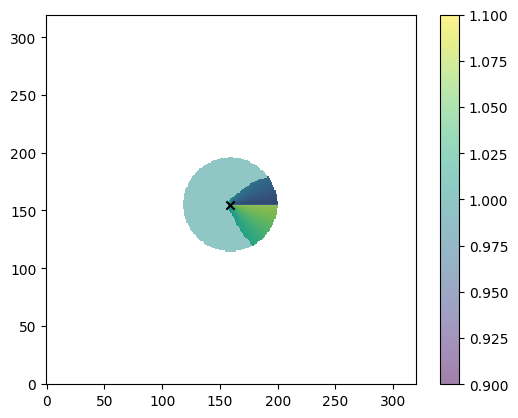

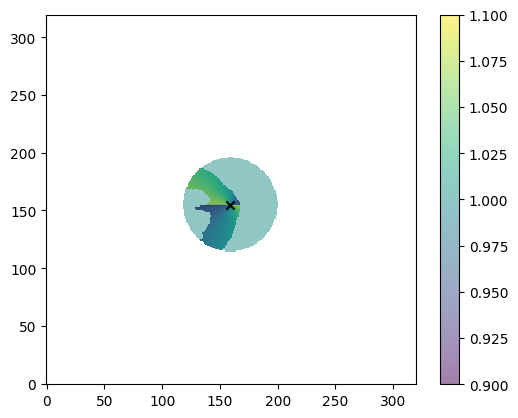

In [109]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

#Define Radius
distance=260.0
radial_cut = (1.5e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
print(radial_cut)

B = PA_grid*maskb

from astropy.coordinates import SkyCoord
from astropy import units as u
from regions import PixCoord
from regions import CircleSkyRegion, CirclePixelRegion
from astropy.wcs import WCS

image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

c = SkyCoord('18 29 23.41 -1 38 55.72', unit=(u.hourangle, u.deg))
print(c)
#center_sky = SkyCoord(277.34, -1.64, unit='deg', frame='icrs')
region_sky = CircleSkyRegion(center=c, radius=0.00160256 * u.deg)
pix_reg = region_sky.to_pixel(w)
print(pix_reg)
mask_sky=np.ones([image_header_b['NAXIS2'],image_header_b['NAXIS1']])*np.nan

for i in range(image_header_b['NAXIS2']):
    for j in range(image_header_b['NAXIS1']):
        pix=PixCoord(x=j,y=i)
        if pix in pix_reg:
            mask_sky[i][j]=1
    
maskedb=B*mask_sky
B[250:,:] =np.nan
print(mask_sky.shape)
                                                            
plt.imshow(maskedb,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

R = PA_grid*maskr
maskedr=R*mask_sky
#R[:225,:] =np.nan
plt.imshow(maskedr,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

In [110]:
#print(len(binrange))

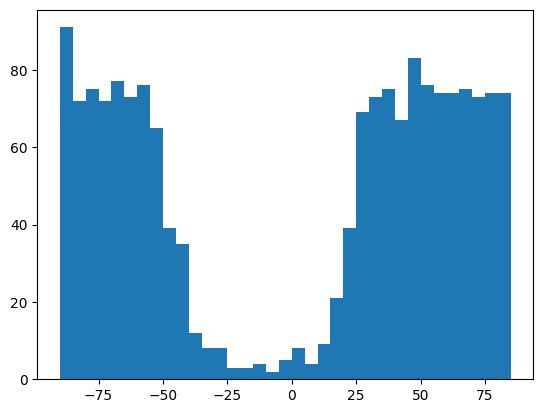

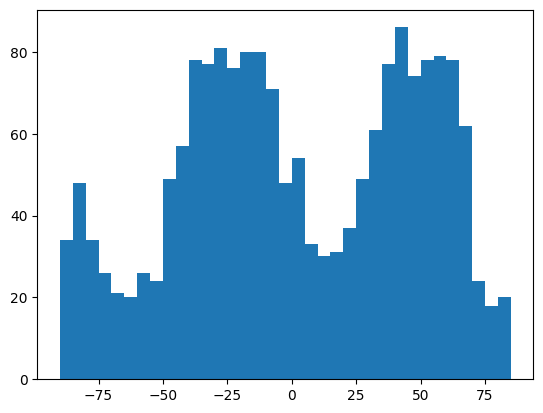

[91. 72. 75. 72. 77. 73. 76. 65. 39. 35. 12.  8.  8.  3.  3.  4.  2.  5.
  8.  4.  9. 21. 39. 69. 73. 75. 67. 83. 76. 74. 74. 75. 73. 74. 74.]
[-90. -85. -80. -75. -70. -65. -60. -55. -50. -45. -40. -35. -30. -25.
 -20. -15. -10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.
  50.  55.  60.  65.  70.  75.  80.  85.]
35 36
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]


In [111]:
binrange = np.arange(-90,90,5)
outputb = plt.hist(maskedb.flatten(),bins=binrange)

plt.show()


outputr = plt.hist(maskedr.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)
PA2=np.arange(-90,260,5)#(astropy.coordinates) #— Astropy v5.3.3

(array([17]),)
36


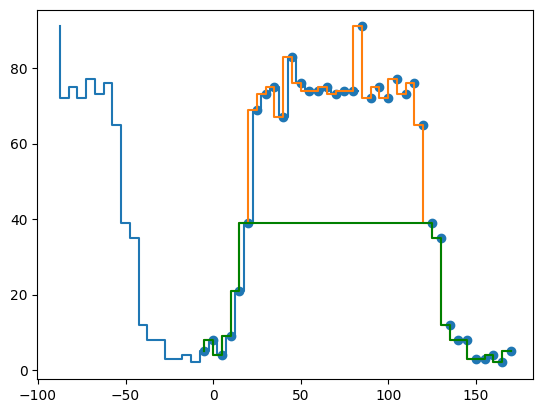

In [112]:
#BLUE

#PA=np.arange(2.5,177.5,5)
print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0], ds='steps')
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputb[0][y1], ls='dashed', c='r')
#plt.axhline(outputb[0][y2],ls='dashed', c='g')
#plt.show()

cent=np.where(PA==-2.5)[0][0]

flipped_array_y=np.r_[outputb[0][cent:],(outputb[0][0:cent+1])]

flipped_array_x=PA2[cent:cent+len(flipped_array_y)]
print(len(flipped_array_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
plt.plot(flipped_array_x,flipped_array_y, ds='steps')
plt.scatter(flipped_array_x,flipped_array_y)


x_subset = np.concatenate((flipped_array_x[:6], flipped_array_x[-10:]))
y_subset = np.concatenate((flipped_array_y[:6], flipped_array_y[-10:]))
plt.plot(x_subset,y_subset, ds='steps', color='g')

36


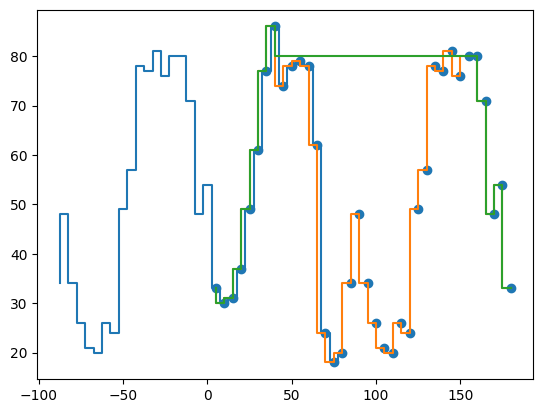

In [126]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0], ds='steps')

centr=np.where(PA==7.5)[0][0]
flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]
flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
print(len(flipped_arrayr_y))  

plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
plt.scatter(flipped_arrayr_x,flipped_arrayr_y)

x_subsetr = np.concatenate((flipped_arrayr_x[:8], flipped_arrayr_x[-5:]))
y_subsetr = np.concatenate((flipped_arrayr_y[:8], flipped_arrayr_y[-5:]))
plt.plot(x_subsetr,y_subsetr, ds='steps')

Std error [0.53903364 2.02919649]


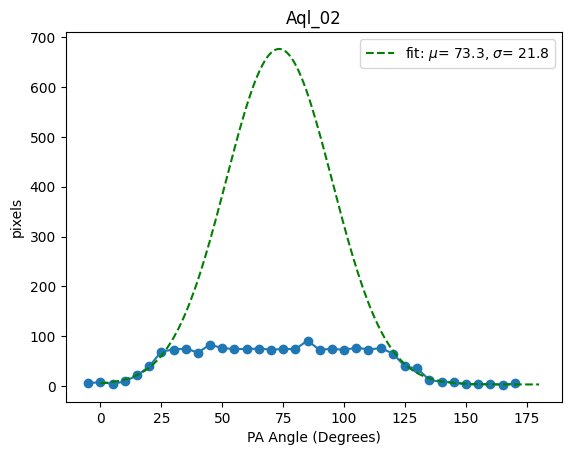

Std error [0.70803774 4.73267967]


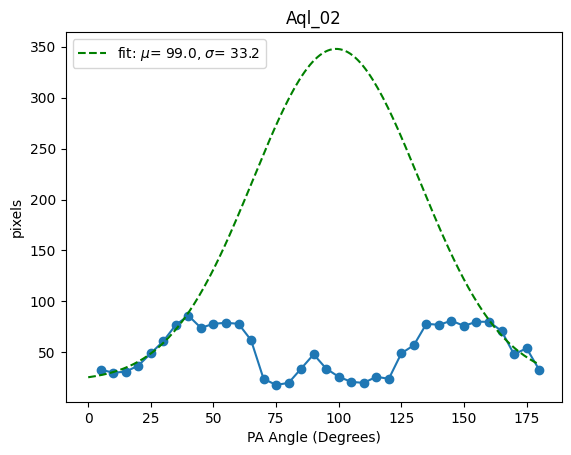

In [127]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c

#BLUE
plt.figure()
#plt.hist(B.flatten(),bins=binrange)
target_func = gaussian
#popt, pcov = curve_fit(target_func,PA,outputb[0],p0=[300,25,20,1], maxfev=100000)
#popt, pcov = curve_fit(target_func,np.r_[PA2[20:27],PA2[37:-16]],\
                       #np.r_[outputb[0][20:27],outputb[0][2:-16]],p0=[300,75,20,1], maxfev=100000)

popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,75,75,1], maxfev=100000)

plt.scatter(flipped_array_x,flipped_array_y)
plt.plot(flipped_array_x,flipped_array_y)

x = np.linspace(-0,180,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_02")
plt.savefig("Aql_02_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]


#RED
plt.figure()
#plt.hist(R.flatten(),bins=binrange)
target_func = gaussian
#popt, pcov = curve_fit(target_func,PA,outputr[0],p0=[500,0,45,1], maxfev=100000)

popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[300,80,90,1], maxfev=100000)

plt.scatter(flipped_arrayr_x,flipped_arrayr_y)
plt.plot(flipped_arrayr_x,flipped_arrayr_y)

x = np.linspace(-0,180,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_02")
plt.savefig("Aql_02_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

0.003205128205128205 deg
<SkyCoord (ICRS): (ra, dec) in deg
    (277.34754167, -1.64881111)>
Region: CirclePixelRegion
center: PixCoord(x=158.9331764567587, y=154.85423474067397)
radius: 82.41685709170306
(320, 320)


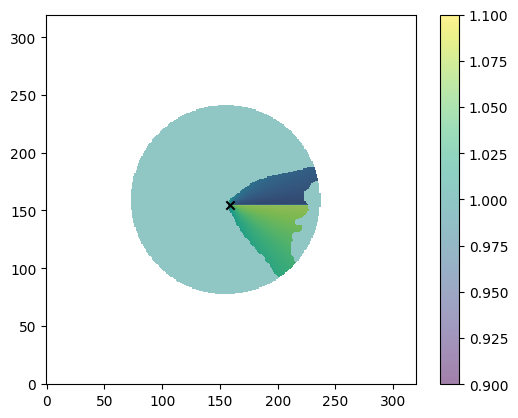

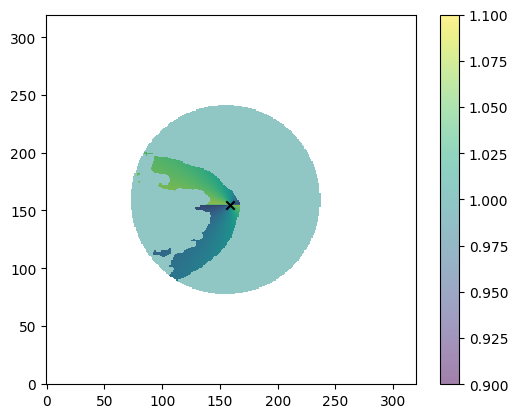

In [128]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

#Define Radius
distance=260.0
radial_cut = (3e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
print(radial_cut)

B = PA_grid*maskb

from astropy.coordinates import SkyCoord
from astropy import units as u
from regions import PixCoord
from regions import CircleSkyRegion, CirclePixelRegion
from astropy.wcs import WCS

image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

c = SkyCoord('18 29 23.41 -1 38 55.72', unit=(u.hourangle, u.deg))
print(c)
#center_sky = SkyCoord(277.34, -1.64, unit='deg', frame='icrs')
region_sky = CircleSkyRegion(center=c, radius=0.0032051 * u.deg)
pix_reg = region_sky.to_pixel(w)
print(pix_reg)
mask_sky=np.ones([image_header_b['NAXIS2'],image_header_b['NAXIS1']])*np.nan

for i in range(image_header_b['NAXIS2']):
    for j in range(image_header_b['NAXIS1']):
        pix=PixCoord(x=i,y=j)
        if pix in pix_reg:
            mask_sky[i][j]=1
    
maskedb=B*mask_sky
B[250:,:] =np.nan
print(mask_sky.shape)
                                                            
plt.imshow(maskedb,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

R = PA_grid*maskr
maskedr=R*mask_sky
#R[:225,:] =np.nan
plt.imshow(maskedr,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

In [129]:
#print(len(binrange))

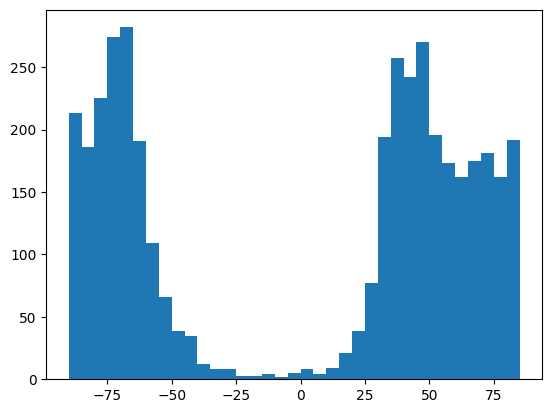

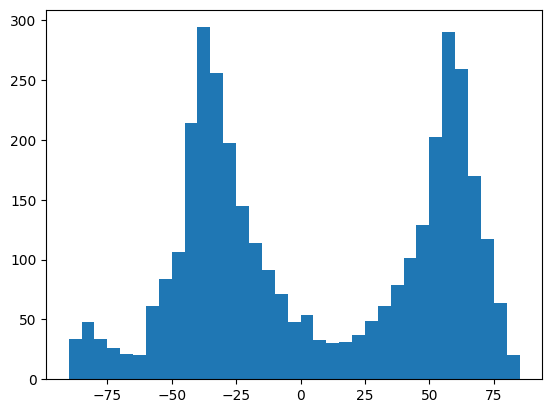

[213. 186. 225. 274. 282. 191. 109.  66.  39.  35.  12.   8.   8.   3.
   3.   4.   2.   5.   8.   4.   9.  21.  39.  77. 194. 257. 242. 270.
 196. 173. 162. 175. 181. 162. 192.]
[-90. -85. -80. -75. -70. -65. -60. -55. -50. -45. -40. -35. -30. -25.
 -20. -15. -10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.
  50.  55.  60.  65.  70.  75.  80.  85.]
35 36
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]


In [130]:
binrange = np.arange(-90,90,5)
outputb = plt.hist(maskedb.flatten(),bins=binrange)

plt.show()


outputr = plt.hist(maskedr.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)
PA2=np.arange(-90,260,5)#(astropy.coordinates) #— Astropy v5.3.3

(array([17]),)
36


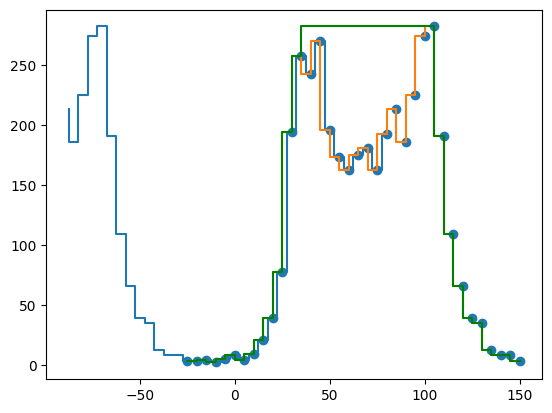

In [148]:
#BLUE

#PA=np.arange(2.5,177.5,5)
print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0], ds='steps')
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputb[0][y1], ls='dashed', c='r')
#plt.axhline(outputb[0][y2],ls='dashed', c='g')
#plt.show()

cent=np.where(PA==-22.5)[0][0]

flipped_array_y=np.r_[outputb[0][cent:],(outputb[0][0:cent+1])]

flipped_array_x=PA2[cent:cent+len(flipped_array_y)]
print(len(flipped_array_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
plt.plot(flipped_array_x,flipped_array_y, ds='steps')
plt.scatter(flipped_array_x,flipped_array_y)


x_subset = np.concatenate((flipped_array_x[:13], flipped_array_x[-10:]))
y_subset = np.concatenate((flipped_array_y[:13], flipped_array_y[-10:]))
plt.plot(x_subset,y_subset, ds='steps', color='g')

36


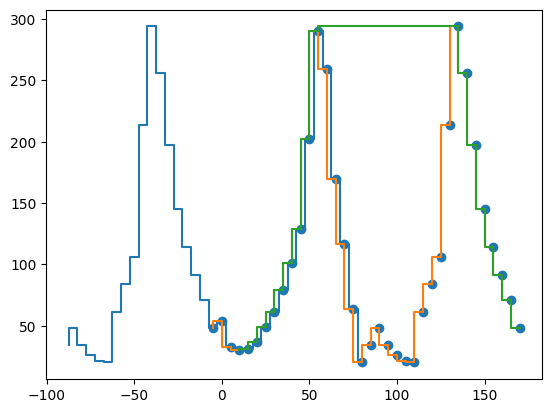

In [149]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0], ds='steps')
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

centr=np.where(PA==-2.5)[0][0]

flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subsetr = np.concatenate((flipped_arrayr_x[3:13], flipped_arrayr_x[-8:]))
y_subsetr = np.concatenate((flipped_arrayr_y[3:13], flipped_arrayr_y[-8:]))
plt.plot(x_subsetr,y_subsetr, ds='steps')

Std error [0.23553293 0.6193286 ]


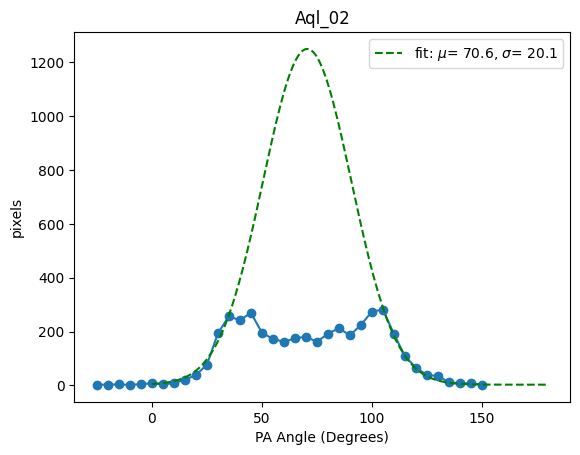

Std error [0.42058992 1.43838909]


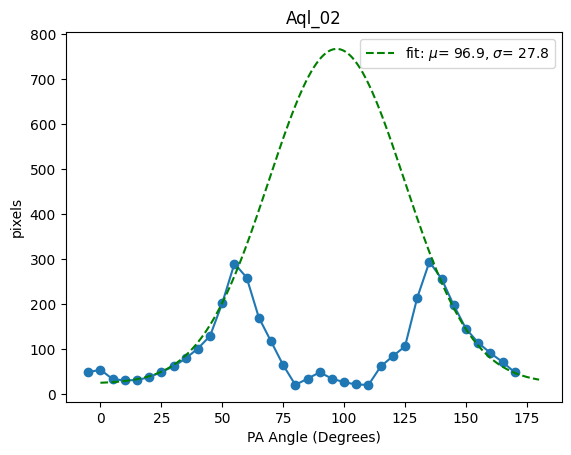

In [150]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c

#BLUE
plt.figure()
#plt.hist(B.flatten(),bins=binrange)
target_func = gaussian
#popt, pcov = curve_fit(target_func,PA,outputb[0],p0=[300,25,20,1], maxfev=100000)
#popt, pcov = curve_fit(target_func,np.r_[PA2[20:27],PA2[37:-16]],\
                       #np.r_[outputb[0][20:27],outputb[0][2:-16]],p0=[300,75,20,1], maxfev=100000)

popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,80,30,1], maxfev=100000)

plt.scatter(flipped_array_x,flipped_array_y)
plt.plot(flipped_array_x,flipped_array_y)

x = np.linspace(-0,180,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_02")
plt.savefig("Aql_02_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]


#RED
plt.figure()
#plt.hist(R.flatten(),bins=binrange)
target_func = gaussian
#popt, pcov = curve_fit(target_func,PA,outputr[0],p0=[500,0,45,1], maxfev=100000)

popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[300,70,30,1], maxfev=100000)

plt.scatter(flipped_arrayr_x,flipped_arrayr_y)
plt.plot(flipped_arrayr_x,flipped_arrayr_y)

x = np.linspace(-0,180,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_02")
plt.savefig("Aql_02_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

### Annulus Masks

0.0016025641025641025 deg
0.003205128205128205 deg
<SkyCoord (ICRS): (ra, dec) in deg
    (277.34754167, -1.64881111)>
Region: CircleAnnulusPixelRegion
center: PixCoord(x=158.9331764567587, y=154.85423474067397)
inner_radius: 41.20878854585131
outer_radius: 82.41737137741704
(320, 320)


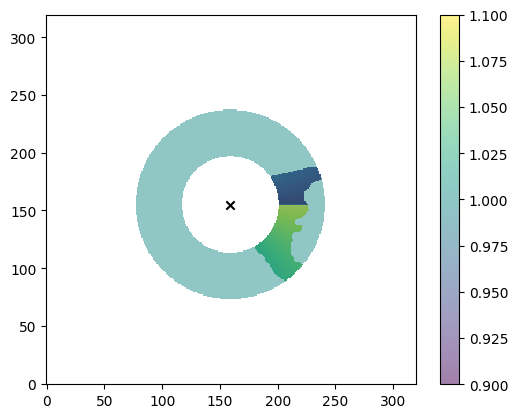

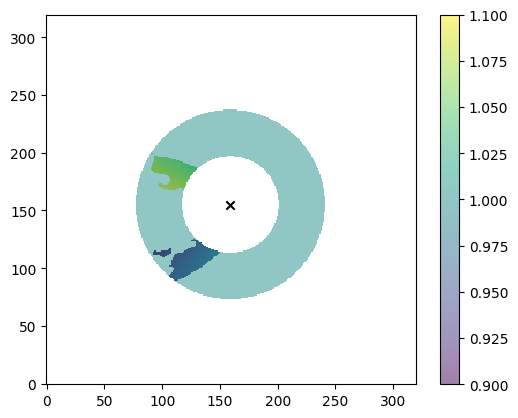

In [151]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

#Define Radius
distance=260.0
radial_cut1 = (1.5e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
print(radial_cut1)
radial_cut2 = (3e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
print(radial_cut2)

B = PA_grid*maskb

from astropy.coordinates import SkyCoord
from astropy import units as u
from regions import PixCoord
from regions import CircleAnnulusSkyRegion, CirclePixelRegion
from astropy.wcs import WCS

image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

c = SkyCoord('18 29 23.41 -1 38 55.72', unit=(u.hourangle, u.deg))
print(c)
#center_sky = SkyCoord(277.34, -1.64, unit='deg', frame='icrs')
region_sky = CircleAnnulusSkyRegion(center=c, inner_radius=0.001602564 * u.deg,outer_radius=0.00320512 * u.deg)
pix_reg = region_sky.to_pixel(w)
print(pix_reg)
mask_sky=np.ones([image_header_b['NAXIS2'],image_header_b['NAXIS1']])*np.nan

for i in range(image_header_b['NAXIS2']):
    for j in range(image_header_b['NAXIS1']):
        pix=PixCoord(x=j,y=i)
        if pix in pix_reg:
            mask_sky[i][j]=1
    
maskedb=B*mask_sky
B[250:,:] =np.nan
print(mask_sky.shape)
                                                            
plt.imshow(maskedb,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
#add_scalebar(ax, scalebar_angle, label="1,000 au", color="black")
plt.colorbar()
plt.show()

R = PA_grid*maskr
maskedr=R*mask_sky
#R[:225,:] =np.nan
plt.imshow(maskedr,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower',alpha=0.5)
plt.colorbar()
plt.show()

In [152]:
#print(len(binrange))

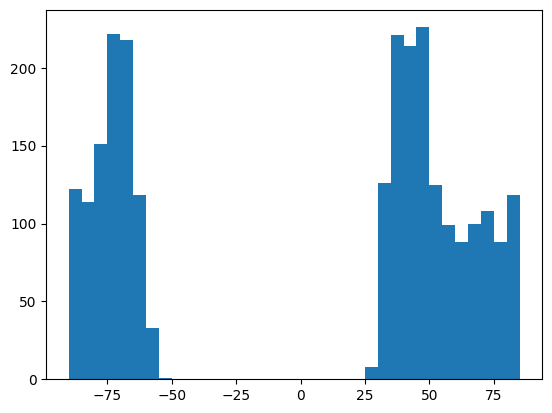

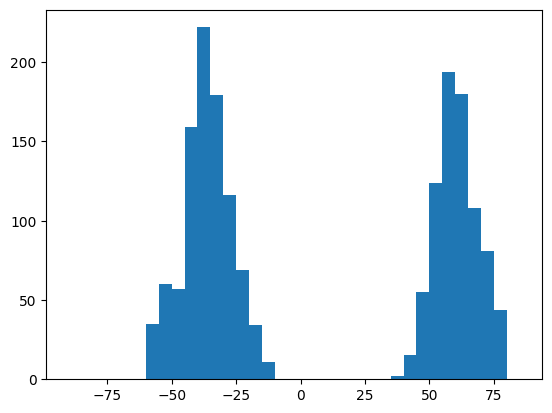

[122. 114. 151. 222. 218. 118.  33.   1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   8. 126. 221. 214. 226.
 125.  99.  88. 100. 108.  88. 118.]
[-90. -85. -80. -75. -70. -65. -60. -55. -50. -45. -40. -35. -30. -25.
 -20. -15. -10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.
  50.  55.  60.  65.  70.  75.  80.  85.]
35 36
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]


In [153]:
binrange = np.arange(-90,90,5)
outputb = plt.hist(maskedb.flatten(),bins=binrange)

plt.show()


outputr = plt.hist(maskedr.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)
PA2=np.arange(-90,260,5)#(astropy.coordinates) #— Astropy v5.3.3

(array([17]),)
36


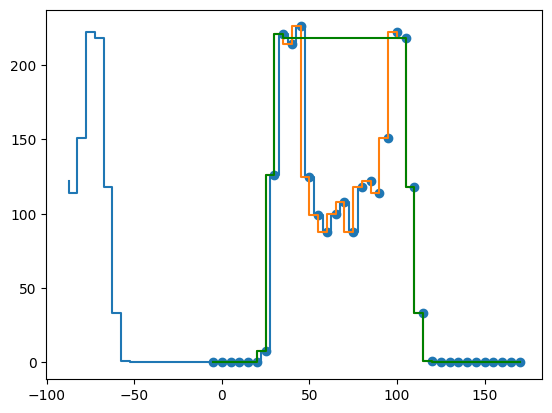

In [163]:
#BLUE

#PA=np.arange(2.5,177.5,5)
print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0], ds='steps')
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputb[0][y1], ls='dashed', c='r')
#plt.axhline(outputb[0][y2],ls='dashed', c='g')
#plt.show()

cent=np.where(PA==-2.5)[0][0]

flipped_array_y=np.r_[outputb[0][cent:],(outputb[0][0:cent+1])]

flipped_array_x=PA2[cent:cent+len(flipped_array_y)]
print(len(flipped_array_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
plt.plot(flipped_array_x,flipped_array_y, ds='steps')
plt.scatter(flipped_array_x,flipped_array_y)


x_subset = np.concatenate((flipped_array_x[:9], flipped_array_x[-14:]))
y_subset = np.concatenate((flipped_array_y[:9], flipped_array_y[-14:]))
plt.plot(x_subset,y_subset, ds='steps', color='g')
plt.show()



36


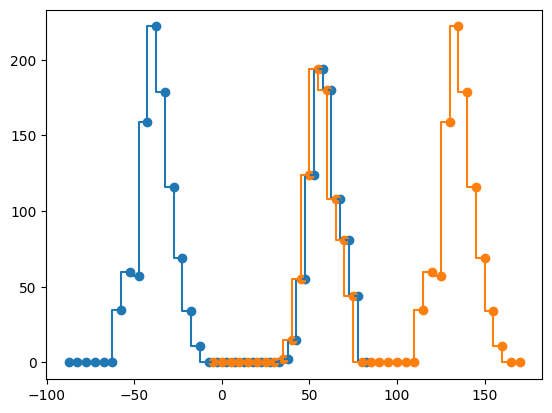

In [164]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0], ds='steps')
plt.scatter(PA,outputr[0])

#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

centr=np.where(PA==-2.5)[0][0]

flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
print(len(flipped_arrayr_y))

plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subsetr = np.concatenate((flipped_arrayr_x[:13], flipped_arrayr_x[-7:]))
y_subsetr = np.concatenate((flipped_arrayr_y[:13], flipped_arrayr_y[-7:]))

Std error [0.20437316 0.64314053]


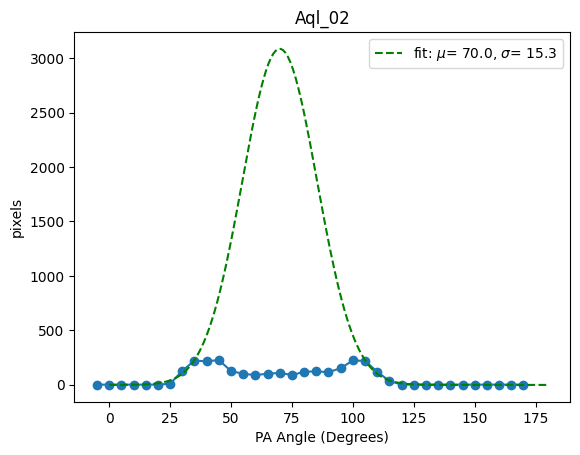

Std error [0.20898611 0.65065568]


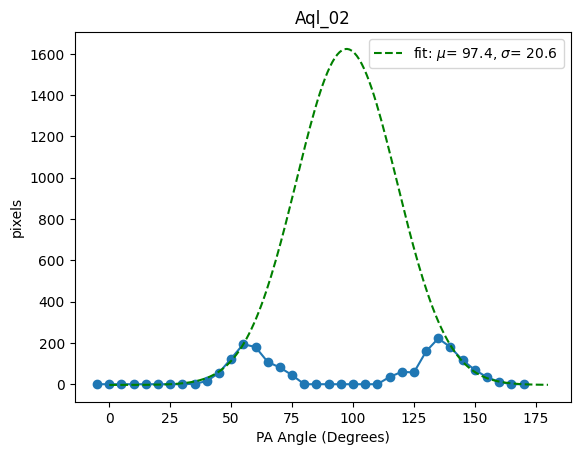

In [165]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c

#BLUE
plt.figure()
#plt.hist(B.flatten(),bins=binrange)
target_func = gaussian
#popt, pcov = curve_fit(target_func,PA,outputb[0],p0=[300,25,20,1], maxfev=100000)
#popt, pcov = curve_fit(target_func,np.r_[PA2[20:27],PA2[37:-16]],\
                       #np.r_[outputb[0][20:27],outputb[0][2:-16]],p0=[300,75,20,1], maxfev=100000)

popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,75,45,1], maxfev=100000)

plt.scatter(flipped_array_x,flipped_array_y)
plt.plot(flipped_array_x,flipped_array_y)

x = np.linspace(-0,180,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_02")
plt.savefig("Aql_02_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]




#RED
plt.figure()
#plt.hist(R.flatten(),bins=binrange)
target_func = gaussian
#popt, pcov = curve_fit(target_func,PA,outputr[0],p0=[500,0,45,1], maxfev=100000)

popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[300,95,55,1], maxfev=100000)

plt.scatter(flipped_arrayr_x,flipped_arrayr_y)
plt.plot(flipped_arrayr_x,flipped_arrayr_y)

x = np.linspace(-0,180,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_02")
plt.savefig("Aql_02_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

-15.933176456758702 164.14576525932603


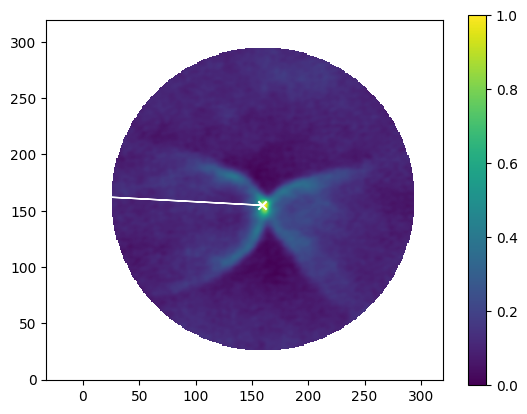

In [83]:
from astropy.coordinates import SkyCoord
from regions import PixCoord, LineSkyRegion, LinePixelRegion

plt.imshow(image_datar+image_datab,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="white", label="RA/Dec Mark")
plt.colorbar()

position_angle = np.round(84,1)  

for i in range(image_header_b['NAXIS2']):
    for j in range(image_header_b['NAXIS1']):
        y = i-y_source
        x = j-x_source
        #if x ==0:
            #pass
            #angle = np.round(-np.arctan(np.inf)/np.pi*180)
        #if:
        angle = np.round(-np.arctan(y/x)/np.pi*180)
#        print(f"Angle: {angle}, Position Angle: {position_angle}")
        #print(angle)
        if np.allclose(angle, position_angle, atol=1e-5):
            x2 = x
            y2 = y

print(x2,y2)
region_pix = LinePixelRegion(start=PixCoord(x=x_source, y=y_source), end=PixCoord(x=x2, y=y2))
patch = region_pix.as_artist(edgecolor='white',ls='-')  
plt.gca().add_patch(patch)
plt.show()